<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Hypothesis Testing

_Authors: Kiefer Katovich (SF), Matt Brems (DC), Justin Pounders (ATL)_

---

### Learning Objectives
- Define the null and alternative hypotheses.
- Perform a two-sample t-test.
- Define the t-statistics and p-value.
- List the steps of hypothesis testing.

In [2]:
# Bring in our libraries.
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Introduction to Hypothesis Testing

In the real world, we like to make **data-driven decisions$^{TM}$**!
- In order to make these decisions, though, we need to collect some data.
- We take this data, put it into a "box," and the output effectively tells us what type of decision we should make.
- This "box" is hypothesis testing.

Hypothesis testing is a little more complicated than that, but not much!

### Hypothesis Testing with Puppies

[This example is pulled liberally from Cassie Kozyrkov's Medium post.](https://hackernoon.com/explaining-p-values-with-puppies-af63d68005d0)

Let's say that we come home at the end of the day to find some unspooled toilet paper.

<img src="./images/pug_toilet_paper.jpg" alt="doggo" width="600"/>

We need to make a **data-driven** decision: Do we yell at our dog? 

Our possibilities are:
- Yes, we yell at our dog.
- No, we don't yell at our dog.

Let's assume that our dog is innocent. Being good data scientists, we want to gather data, then use this data to make a decision.
- We check to see if the bathroom window is open or closed.
    - If it's open, maybe a gust of wind caused the toilet paper to unravel.
    - If it's closed, then something else caused the toilet paper to unravel.
- We check the thermostat to see if we left the heating/air conditioning on.
    - If you left it on, maybe the floor vent in the bathroom caused the toilet paper to unravel.
    - If it's turned off, then the floor vent couldn't have caused the toilet paper to unravel.
- We text your sibling to see if they brought our niece over.
    - If they came over, maybe our niece unraveled the toilet paper.
    - If they didn't come over, then our niece couldn't have unraveled the toilet paper.

Once you're done "gathering your data," you make a decision.
- If there's enough evidence to accept that our dog is guilty, then we'll yell at our dog.
- If there's not enough evidence to say that our dog is guilty, then we'll just cuddle with our dog.

We just walked through a hypothesis test! We had two potential decisions, we gathered data, and used this data to make a decision.

### Hypothesis Testing: A Drug Efficacy Example

---

Say we are testing the efficacy of a new drug:

- We randomly select 50 people to be in the placebo control condition and 50 people to recieve the treatment.
    - In the context of experiments, we often talk about the "control" group and the "experimental" or "treatment" group. In our example, the control group is the one given the placebo (sugar pill) and the treatment group is the one given the actual drug. 
- We are interested in the average difference in blood pressure levels between the treatment and control groups.
- We know our sample is selected from a broader, unknown population pool.
- We can imagine that, in a hypothetical parallel world, we could have ended up with a different random sample of subjects from the population pool.

<a id='null-hypothesis'></a>

### The "Null" Hypothesis

---

The **null hypothesis** is a fundamental concept of statistical tests. We typically denote the null hypothesis with $H_0$.
- In our dog example, we assume that our dog is innocent.
- In our drug efficacy experiment example, our null hypothesis is that there is no difference in blood pressure between a subject taking a placebo and and one taking the treatment drug.

> $H_0:$ The average difference in blood pressure between treatment and control groups is zero.

<a id='alternative-hypothesis'></a>

### The "Alternative Hypothesis"

---

The **alternative hypothesis** is the outcome of the experiment that we hope to show. It's the opposite of our null hypothesis!
- In our dog example, the alternative hypothesis is that our dog is guilty of unspooling the toilet paper.
- In our drug efficacy experiment example, the alternative hypothesis is that there is in fact an average difference in blood pressure between the treatment and control groups. 

> $H_A:$ The parameter of interest — our average difference between treatment and control — is not zero.

**NOTE:** The null and alternative hypotheses are concerned with the true values, or, in other words, the **parameter of the overall population**. Through hypothesis testing, we will make an **inference** (a decision) about this population parameter.

### Introduction to the $t$-Test

---

In our dog example, we gathered data in a way that's different from how we'll usually gather data in order to make a decision.

Say that, in our drug experiment, we measure the following results:

- The 50 subjects in the control group have an average systolic blood pressure of 121.38.
- The 50 subjects in the experimental/treatment group have an average systolic blood pressure of 111.56.

The difference between experimental and control samples is -9.82 points. 

**But**, with only 50 subjects in each sample, how confident can we be that this measured difference is real? Do we have enough evidence to say that the population average blood pressure is different between these two groups?

We can perform what is known as a **t-test** to evaluate this. (A $t$-test is one of many, many types of hypothesis tests.)

Four steps to hypothesis testing:
1. Construct a null hypothesis that you want to contradict and its complement, the alternative hypothesis.
2. Specify a level of significance.
3. Calculate your test statistic.
4. Find your $p$-value and make a conclusion.

**We can set up the experimental and control observations below as `numpy` arrays.**

In [3]:
control = np.array([166, 165, 120,  94, 104, 166,  98,  85,  97,  87, 114, 100, 152,
                    87, 152, 102,  82,  80,  84, 109,  98, 154, 135, 164, 137, 128,
                    122, 146,  86, 146,  85, 101, 109, 105, 163, 136, 142, 144, 140,
                    128, 126, 119, 121, 126, 169,  87,  97, 167,  89, 155])

experimental = np.array([ 83, 100, 123,  75, 130,  77,  78,  87, 116, 116, 141,  93, 107,
                         101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
                         97,  95, 104, 141,  80, 110, 136, 134, 142, 135, 111,  83,  86,
                         116,  86, 117,  87, 143, 104, 107,  86,  88, 124,  76])

# Print the average of the control and experimental groups.

# Print the difference of the sample means, too.

<a id='likelihood-data'></a>

### Step 1: Construct the null and alternative hypotheses

---

For our experiment, we will set up a null hypothesis and an alternative hypothesis:

$$ H_0: \text{The true mean difference in systolic blood pressure between those who receive the treatment and those who do not is 0.} $$

$$ H_A: \text{The true mean difference in systolic blood pressure between those who receive the treatment and those who do not is NOT 0.} $$

Likewise, our measured difference is **-9.82**.

Written out using probability notation, we want to know:

### $$P(\text{data}\;|\;H_0 \text{ true})$$

**What is the probability that we observed this data, assuming that our null hypothesis is true?**


### Step 2: Specify a level of significance

If we assume that our null hypothesis is true, and the probability of observing the data we observed is "small," then our data does not support our null hypothesis. 

**But how "small" is small enough?**

This is set by our level of significance, which we call $\alpha$.

Typically (and arbitrarily) the value $\alpha=0.05$ is used.
- This means that there is a 5% chance that we will _incorrectly reject the null hypothesis_ (a.k.a. Type 1 error or false positive).
- Put another way, there is a 5% chance that we will claim a significant difference in blood pressure between the two groups when in fact there is no (statistically significant) difference.

### Step 3: Calculating your Test Statistic

---

Remember that hypothesis testing is a "box" where the inputs are our data and the outputs allow us to make our decision? Well, in this "box," we are calculating $P(\text{data}\;|\;H_0 \text{ true})$. This calculation requires picking a probability distribution, then comparing the results of our experiment to this distribution to see how extreme our results are relative to the null hypothesis.

When comparing two means, the **t-statistic** (based on the [Student's $t$-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution)) is a classic way to quantify the difference between groups. In essence, our $t$-statistic is be a standardized version of the difference between groups.

Luckily, our computer will do this for us!

---

<details><summary>Want the mathematical details of the calculation of the t-statistic?</summary>
When comparing the difference between groups, we can calculate the two-sample t-statistic like so:

### $$t = \frac{\bar{x}_E - \bar{x}_C}{\sqrt {s^2 \Big(\frac{1}{n_E} + \frac{1}{n_C}\Big)}}$$

In our example, $\bar{x}_E$ is the mean of our experimental group's sample measurements and $\bar{x}_C$ is the mean of our control group's sample measurements.

$n_E$ and $n_C$ are the number of observations in each group. 

The $s^2$ denotes our *sample variance*. In this version of the t-test, we are assuming equal variances in our experimental and control groups in the overall population. There is another way to calculate the t-test where equal variance is not assumed, but, in our case, it is a reasonable assumption.

The sample variance is calculated like so:

### $$ s^2 = \frac{\sum_{i=1}^{n_E} (x_i - \bar{x}_E)^2 + \sum_{j=1}^{n_C} (x_j - \bar{x}_C)^2}{ n_E + n_C -2} $$

This combines the variance of the two groups' measurements into a single pooled metric. 

</details>

## TL;DR What are we doing?

**GOAL:** To tell whether or not our new treatment is effective. We define "effective" as whether or not those who get the treatment see lower systolic blood pressure, on average.

To do this, we follow the following steps to carry out a **hypothesis test**:

1. Set up null and alternative hypotheses. In pure math terms that, looks like this:

$$ H_0: \mu_{\text{treatment}} - \mu_{\text{placebo}} = 0 $$
$$ H_A: \mu_{\text{treatment}} - \mu_{\text{placebo}} \ne 0 $$

2. Decide on a significance level. $\alpha = 0.05$ is a typical choice.
3. Decide on a hypothesis test. There are a million of them. In this case, we're testing the difference between two means, which is a great time to use a **two-sample $t$-test**.

> The two-sample (independent) $t$-test tests whether or not two population means differ.

4. After carrying out this hypothesis test, we'll see if our data provide enough evidence to reject the null hypothesis.

**Let's do this calculation using `scipy.stats.ttest_ind`.**

> On your own: To try your skills at `numpy` and `python`, try doing this calculation by implementing the above equations on your own!

In [4]:
# Import scipy.stats

In [5]:
# Conduct our t-test.

Ttest_indResult(statistic=-1.8915462966190273, pvalue=0.06161817112302221)

<a id='visualizing-t-statistic'></a>

### Visualizing the T-Statistic

---

From the central limit theorem, we know that (with asymptotically infinite samples), the distribution of sample means drawn from a population is Normal. In the case of smaller sample sizes and unknown population standard deviation, [we adjust this to be a more conservative student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution).

We can plot the student's $t$-distribution below. (It's basically a Normal distribution, but with fatter tails.) 
- It is centered on 0, where a value of 0 corresponds to our null hypothesis. 
- We can also plot a vertical line with our measured t-statistic.

In [7]:
# Generate 500 points on the x axis between -4 and 4:
xpoints = 

# Use `stats.t.pdf` to get values on the probability density function for the t-distribution.
# The second argument is the degrees of freedom: n1 + n2 - 2.
ypoints = stats.t.pdf(xpoints, (50+50-2), 0, 1)

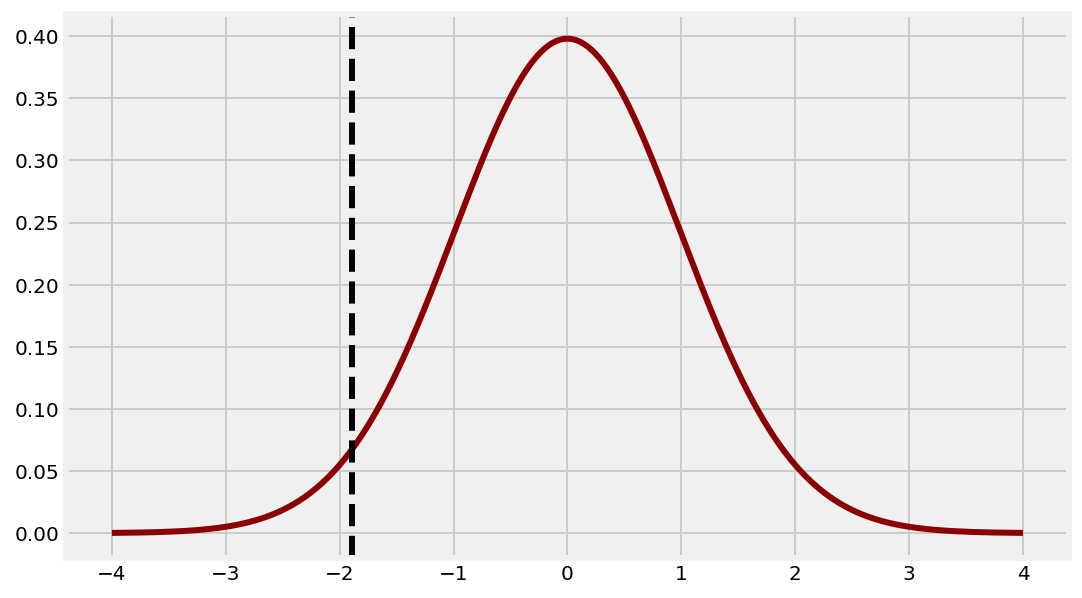

In [13]:
# Initialize a `matplotlib` "figure."
fig = plt.figure(figsize=(8,5))

# Get the current "axis" out of the figure.
ax = fig.gca()

# Plot the lines using `matplotlib`'s plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

# Plot a vertical line for our measured difference in rates' t-statistic.
ax.axvline(t_stat, color='black', linestyle='--', lw=3);

<a id='p-value'></a>

### Step 4: The P-Value

---

Remember that our goal of doing all of this work is to make a decision? Well, using our $t$-statistic, we can generate a **p-value**.

> **The p-value is the probability that, given that the null hypothesis $H_0$ is true, we could have ended up with a statistic at least as extreme as the one measured from our random sample of data from the true population.**

We have measured a difference in blood pressure of -9.82 between the experimental and control groups. We then calculated a $t$-statistic associated with this difference of -1.89. In our specific example:

> The p-value is the probability that, assuming there is truly no difference in blood pressure between experimental and control conditions (i.e., no effect of the drug), we get sample results that are at least as extreme as getting a test statistic of -1.89.

<a id='visualize-p-value'></a>

### Visualizing the P-Value

---

Our null hypothesis states that there is no difference between the groups, so the t-statistic would be 0. 

**We can plot the t-distribution again using our t-statistic of -1.89 as well as a t-statistic of 1.89 on the other side of the distribution.**

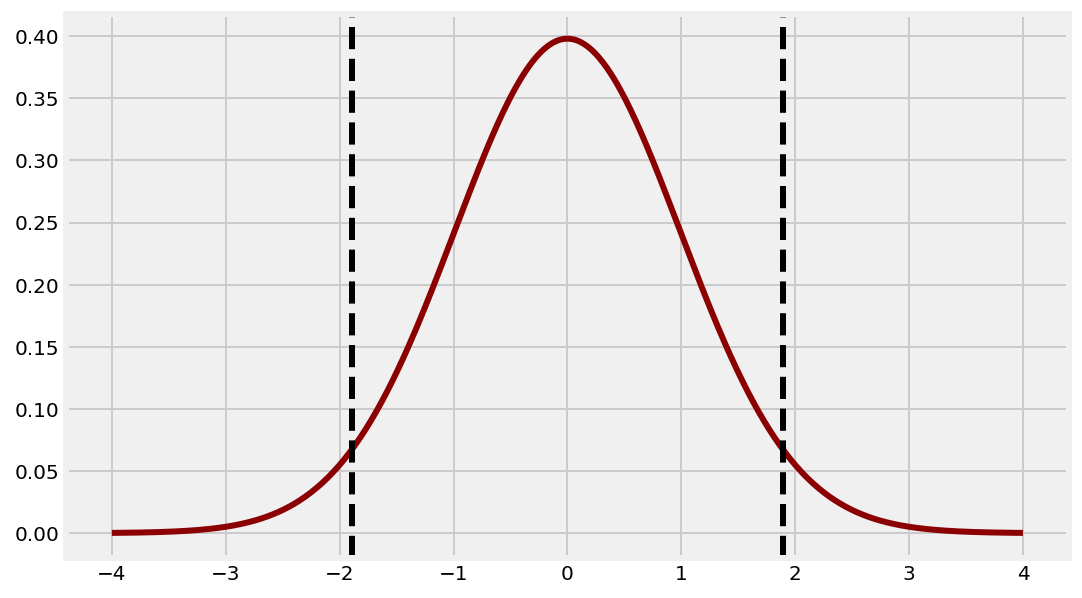

In [12]:
# Initialize a `matplotlib` "figure."
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

ax.axvline(t_stat, color='black', linestyle='--', lw=3)
ax.axvline(-t_stat, color='black', linestyle='--', lw=3);

**Our p-value corresponds to the area under the curve of the distribution where the magnitude of the t-statistic is greater than or equal to the one we measured (shown with the dotted lines)**.

`stats.t.cdf()` is the cumulative distribution function and will calculate the area under the curve, up to a specified t-statistic. 

**Calculate the area under the tails of the t-distribution that falls beyond the dotted lines using the `.cdf()` function. This will verify that it's the same as the p-value calculated by `scipy`.**

In [14]:
n_exp = len(experimental)
n_con = len(control)

lower_tail = stats.t.cdf(-abs(t_stat), n_exp + n_con - 2)
upper_tail = 1 - stats.t.cdf(abs(t_stat), n_exp + n_con - 2)
p_value_man = lower_tail + upper_tail

print(p_value)
print(p_value_man)

0.06161817112302221
0.06150424067253037


### So how do we make the decision? *(This will show up in interviews!)*

Remember that $\alpha$ is our level of significance.

- If $p\text{-value} < \alpha$, then there is evidence to reject the null hypothesis, so you accept that $H_0$ is incorrect and therefore $H_A$ is correct.
    - i.e., a statisically significant difference between the two groups!
    - This is like saying there is enough evidence to say our dog isn't innocent... so we say our dog is guilty.
- If $p\text{-value} \ge \alpha$, then there is insufficient evidence to reject the null hypothesis and you cannot accept that either $H_0$ or $H_A$ is correct.
    - i.e., there is no statistical difference between your two groups.
    - This is like saying there is not enough evidence to say our dog isn't innocent. We can't totally determine that our dog is innocent, but we haven't determined that our dog is guilty, either.

## So.... what is our decision?

> **DECISION:** Because our $p$-value...

## Other Hypothesis Tests
The goal of this lesson was to teach you, in general, how hypothesis testing works. We showed you what is probably the most common variety of hypothesis test: the $t$-test. However, there are kajillions of other ones out there. It's not worth our time to go over so many more of them, as they all have the same implementation and interpretation, just in different situations. Instead, here is a list of many of the "big" ones and when to use them:

| Situation | Common hypothesis test | Example | Notes |
| --- | --- | --- | --- |
| Testing whether or not one mean is equal to a value | One-sample $t$-test | Do cars on a given road, on average, drive about 65mph? | |
| Testing whether or not two means are equal to eachother | Two-sample $t$-test | Is the mean systolic blood pressure of people who receive Medicine A or Medicine B the same? | |
| Testing whether or not paired observations have the same value | Paired $t$-test | Among heterosexual married couples, is the husband, on average, taller than the wife? | This is functionally the same as a one-sample $t$-test of the differences |
| Testing whether or not three or more means are the same | One-way ANOVA test | Are base salaries upon graduation different for graduates of Penn State, Ohio State, and Michigan? | The ANOVA test has many variants |
| Testing whether or not there is a relationship between two categorical variables | $\chi^2$ test | Is there a relationship between home state and political affiliation? | |
| Testing whether or not a given distribution is normally distributed | Kolmogorov-Smirnov Test | Testing whether or not model residuals are normally distributed. Useful for testing linear regression assumptions! | |
| Testing whether or not one proportion is equal to a number | One-sample $z$-test | Testing whether or not a coin is fair (ie, testing $P(Heads) = 0.5$) | |
| Testing whether or not two proportions are euqal | Two-sample $z$-test | Who is going to win an election? | Testing two or more proportions can be done better with a $\chi^2$ test |






## Recap

Four steps to hypothesis testing:
1. Construct a null hypothesis that you want to contradict and its complement, the alternative hypothesis.
2. Specify a level of significance.
3. Calculate your test statistic.
4. Find your $p$-value and make a conclusion.